In [5]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

data= pd.read_csv("F:\\Projects\\Stock market prediction\\AAPL.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,23-09-2016,28.605000,28.697500,27.887501,28.177500,26.426001,209924800
1,26-09-2016,27.910000,28.347500,27.887501,28.219999,26.465858,119477600
2,27-09-2016,28.250000,28.295000,28.084999,28.272499,26.515097,98429600
3,28-09-2016,28.422501,28.660000,28.357500,28.487499,26.716732,118564400
4,29-09-2016,28.290001,28.450001,27.950001,28.045000,26.301737,143548000
...,...,...,...,...,...,...,...
1253,16-09-2021,148.440002,148.970001,147.220001,148.789993,148.789993,68034100
1254,17-09-2021,148.820007,148.820007,145.759995,146.059998,146.059998,129728700
1255,20-09-2021,143.800003,144.839996,141.270004,142.940002,142.940002,123478900
1256,21-09-2021,143.929993,144.600006,142.779999,143.429993,143.429993,75834000


In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,23-09-2016,28.605000,28.697500,27.887501,28.177500,26.426001,209924800
1,26-09-2016,27.910000,28.347500,27.887501,28.219999,26.465858,119477600
2,27-09-2016,28.250000,28.295000,28.084999,28.272499,26.515097,98429600
3,28-09-2016,28.422501,28.660000,28.357500,28.487499,26.716732,118564400
4,29-09-2016,28.290001,28.450001,27.950001,28.045000,26.301737,143548000


<AxesSubplot:title={'center':'APPLE Stock Prices'}, ylabel='Adj Close'>

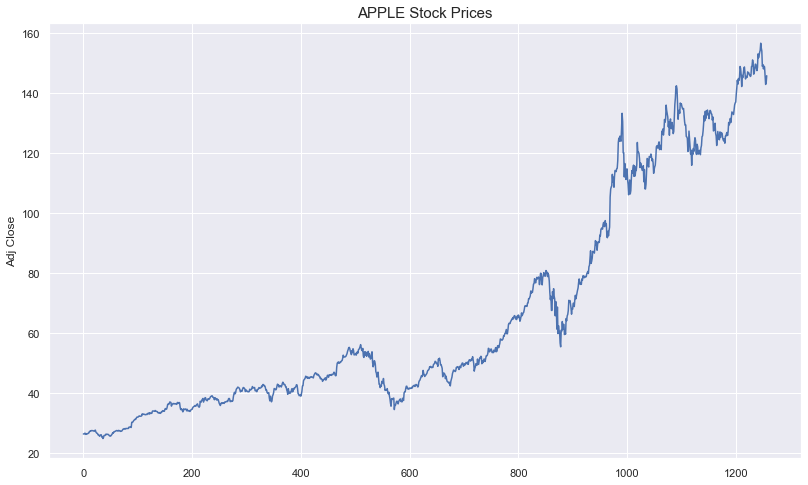

In [7]:
#import dataviz libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
#Plot "Adj Close"
plt.figure(figsize=(12,8))
plt.title("APPLE Stock Prices", fontsize=15)
sns.lineplot(x=data.index, y='Adj Close', data=data)

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999797  0.999705  0.999507   0.999475 -0.090509
High       0.999797  1.000000  0.999634  0.999740   0.999718 -0.083049
Low        0.999705  0.999634  1.000000  0.999748   0.999716 -0.100564
Close      0.999507  0.999740  0.999748  1.000000   0.999969 -0.092593
Adj Close  0.999475  0.999718  0.999716  0.999969   1.000000 -0.091781
Volume    -0.090509 -0.083049 -0.100564 -0.092593  -0.091781  1.000000


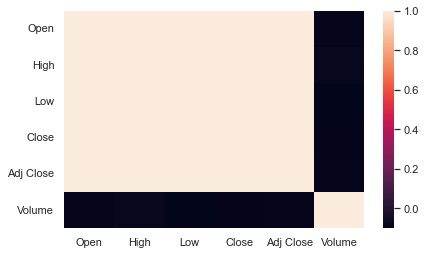

In [8]:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

In [9]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Rate": ypred})
print(data.head())

   Predicted Rate
0       42.275002
1       33.877499
2       27.487499
3       28.992500
4      136.009995


In [11]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Rate": ypred})
print(data.head())

<ipython-input-11-17638eddba64>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)


   Predicted Rate
0       41.640626
1       33.936826
2       27.477274
3       29.065575
4      136.598898


In [12]:
from sklearn.metrics import mean_squared_error
def rmse(ytest,ypred):
    return np.sqrt(mean_squared_error(ytest,ypred))

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
x_train = sc.transform(xtrain)
x_test = sc.transform(xtest)

In [14]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(min_samples_leaf=280)
dt.fit(xtrain,ytrain)
dt_score=dt.score(xtest,ytest)*100

print(dt_score)

pred=np.array(dt.predict(xtest))
actual=ytest
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

dt_mape=mape(actual,pred)
print("Mean Absolute Percentage error=",dt_mape)

90.79595539400823
Mean Absolute Percentage error= 61.68350236862715


In [15]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
from sklearn.svm import SVR
svr = SVR()
svr.fit(xtrain,ytrain)
pred=np.array(svr.predict(xtest))
actual=ytest
svr_score=svr.score(xtest,ytest)*100 
svr_rmse=sqrt(mean_squared_error(actual, pred)) 
print(svr_score)
print(svr_rmse)
pred=np.array(svr.predict(xtest))
actual=ytest
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

svr_mape=mape(actual,pred)
print("Mean Absolute Percentage error=",svr_mape)

c:\users\aishavarya\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


99.33279865250813
2.910481546909898
Mean Absolute Percentage error= 61.68795892348735


In [16]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1)
rfr.fit(xtrain,ytrain)
pred=np.array(rfr.predict (xtest))
actual=ytest
rfr_score=rfr.score(xtest,ytest)*100 
rfr_rmse=sqrt(mean_squared_error(actual, pred)) 
print(rfr_score)
print(rfr_rmse)

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

dt_mape=mape(actual,pred)
print("Mean Absolute Percentage error=",dt_mape)

99.8758997157135
1.2552284698387368
Mean Absolute Percentage error= 62.98176939847632


<ipython-input-16-534d90dd8875>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain,ytrain)


In [17]:
#Importing important libraries
import tensorflow as tf

import keras


from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from keras import layers
from keras import models

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [18]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(xtrain, ytrain, batch_size = 128, epochs = 100, validation_split=0.05)

Epoch 1/100
8/8 [==============================] - 1s 45ms/step - loss: 5976.8716 - val_loss: 6253.8359
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 5955.7451 - val_loss: 6223.7334
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 5917.0278 - val_loss: 6164.2837
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 5843.3179 - val_loss: 6057.2744
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 5718.0039 - val_loss: 5879.7861
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 5511.3135 - val_loss: 5607.3730
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 5206.6064 - val_loss: 5214.0117
Epoch 8/100
8/8 [==============================] - 0s 10ms/step - loss: 4776.9907 - val_loss: 4682.2700
Epoch 9/100
8/8 [==============================] - 0s 11ms/step - loss: 4212.4429 - val_loss: 4008.6177
Epoch 10/100
8/8 [==============================] - 0s 9ms/step - loss

In [19]:
predictions = classifier.predict(xtest)
print(predictions[:10])

[[ 41.642715]
 [ 34.1585  ]
 [ 27.774334]
 [ 29.388931]
 [136.80025 ]
 [ 47.413776]
 [ 66.60305 ]
 [119.58893 ]
 [131.79778 ]
 [118.00005 ]]


In [20]:
trainScore = classifier.evaluate(xtrain, ytrain, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(xtest, ytest, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.66 MSE (0.81 RMSE)
Test Score: 0.81 MSE (0.90 RMSE)


In [21]:
ANN_mape=classifier.evaluate(xtest,ytest)

8/8 [==============================] - 0s 2ms/step - loss: 0.8097


In [22]:
print("Mean Absolurte Percentage Error:",mape)

Mean Absolurte Percentage Error: <function mape at 0x00000185F62BAE50>


In [23]:
outputs= [dt_mape,svr_mape,dt_mape,ANN_mape ]
algorithms = ["Decision Tree","Support Vector ","Random Forest Regressor ","ANN"]

for i in range(len(algorithms)):
    print("The mean absolute precentage error achieved using "+algorithms[i]+" is: "+str(outputs[i])+" %")

The mean absolute precentage error achieved using Decision Tree is: 62.98176939847632 %
The mean absolute precentage error achieved using Support Vector  is: 61.68795892348735 %
The mean absolute precentage error achieved using Random Forest Regressor  is: 62.98176939847632 %
The mean absolute precentage error achieved using ANN is: 0.8096544146537781 %


c:\users\aishavarya\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='MAPE'>

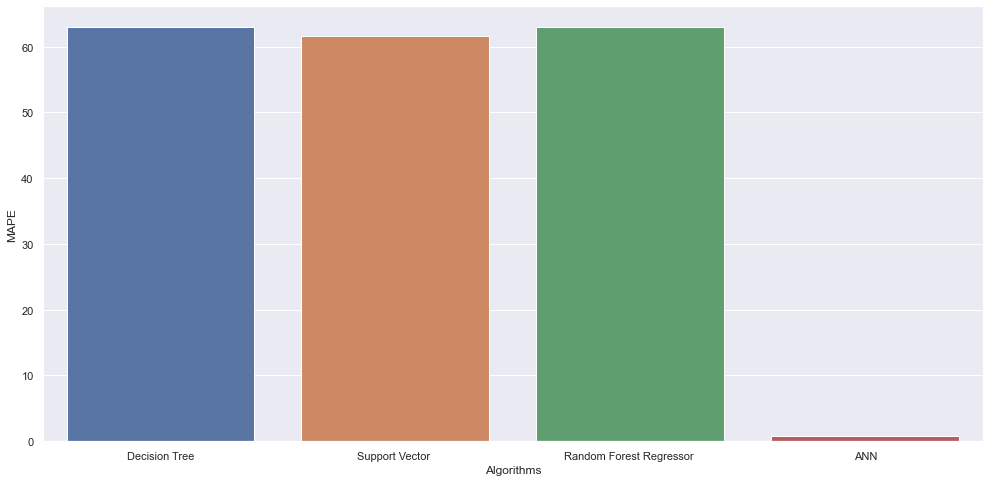

In [24]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("MAPE")

sns.barplot(algorithms,outputs)

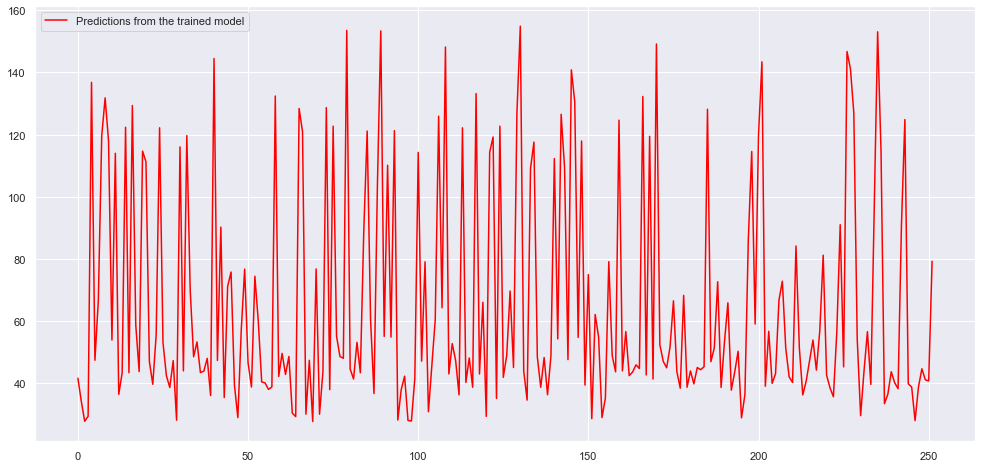

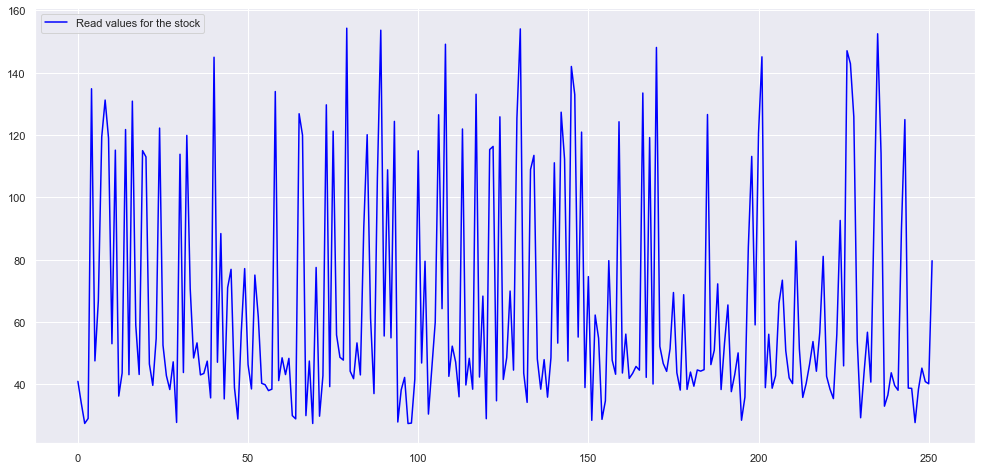

In [25]:
import matplotlib.pyplot as plt
plt.plot(predictions,color='red', label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.show()
plt.plot(ytest,color='blue', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()